In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import json
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None) 


Вот краткое описание каждой из колонок вашего датасета на основе анализа данных Kickstarter на неочищенных данных:

- **backer_counts**: Количество спонсоров.
- **blurb**: Краткое описание проекта.
- **category**: Категория проекта (например, "Product Design", "Technology").
- **converted_pledged_amount**: Сумма, собранная проектом, конвертированная в основную валюту платформы (обычно в доллары США).
- **country**: Код страны, откуда запускается проект (например, "US" для США).
- **country_displayable_name**: Полное имя страны, которое отображается пользователям (например, "United States").
- **created_at**: Время и дата создания проекта (в формате UNIX timestamp).
- **creator**: Информация о создателе проекта (в виде JSON-объекта).
- **currency**: Валюта, в которой собираются деньги (например, "USD" для долларов США).
- **currency_symbol**: Символ валюты (например, "$" для USD).
- **currency_trailing_code**: Флаг (True/False), определяющий, отображается ли символ валюты после числа.
- **current_currency**: Валюта, используемая пользователем для просмотра проекта.
- **deadline**: Дата окончания кампании (в формате UNIX timestamp).
- **disable_communication**: Флаг (True/False), определяющий, могут ли пользователи отправлять сообщения создателям.
- **fx_rate**: Обменный курс валюты проекта по отношению к основной валюте.
- **goal**: Финансовая цель проекта.
- **id**: Уникальный идентификатор проекта.
- **is_disliked**: Флаг (True/False), показывающий, что проект был оценен отрицательно.
- **is_launched**: Флаг (True/False), показывающий, что проект был запущен.
- **is_liked**: Флаг (True/False), показывающий, что проект был оценен положительно.
- **is_starrable**: Флаг (True/False), указывающий, может ли проект быть добавлен в избранное.
- **launched_at**: Время и дата запуска проекта (в формате UNIX timestamp).
- **location**: Информация о местоположении проекта (в виде JSON-объекта).
- **name**: Название проекта.
- **percent_funded**: Процент выполнения цели проекта.
- **photo**: URL изображения обложки проекта.
- **pledged**: Сумма, собранная проектом на момент выгрузки данных.
- **prelaunch_activated**: Флаг (True/False), указывающий, активирован ли проект до запуска.
- **profile**: Профиль проекта, возможно, содержит ссылки и описание.
- **slug**: Уникальный идентификатор проекта в виде URL-friendly строки (обычно используется для создания ссылок).
- **source_url**: URL для перехода к полному описанию проекта на сайте Kickstarter.
- **spotlight**: Флаг (True/False), указывающий, является ли проект "в центре внимания".
- **staff_pick**: Флаг (True/False), указывающий, был ли проект рекомендован командой Kickstarter.
- **state**: Текущий статус проекта (например, "successful", "failed").
- **state_changed_at**: Время и дата последнего изменения статуса проекта (в формате UNIX timestamp).
- **static_usd_rate**: Статический курс USD по отношению к валюте проекта на момент запуска.
- **urls**: Ссылки на страницы проекта (в виде JSON-объекта).
- **usd_exchange_rate**: Обменный курс валюты проекта на момент сбора данных по отношению к USD.
- **usd_pledged**: Сумма, собранная проектом в долларах США.
- **usd_type**: Тип курса обмена валюты (например, "live" или "static").
- **video**: URL видео-презентации проекта.

In [2]:
df = pd.read_csv('/kaggle/input/kick-full-data/full_kickstarter_df.csv')
df.shape

(24912, 41)

In [3]:
with open('/kaggle/working/urls.txt', 'w') as file:
    for index, row in df.iterrows():
        # Преобразуем строку в словарь
        url_dict = json.loads(row['urls'])
        
        # Извлекаем ссылки
        project_url = url_dict['web'].get('project')
        
        # Записываем ссылки в файл построчно
        if project_url:
            file.write(project_url + '\n')

print("Ссылки успешно сохранены в 'urls.txt'.")

df.head(3)

Ссылки успешно сохранены в 'urls.txt'.


,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type,video
0,0,"Pin collection featuring natural, elemental, and mythical soft enamel 1.5'' pin themes.","{""id"":28,""name"":""Product Design"",""analytics_name"":""Product Design"",""slug"":""design/product design"",""position"":5,""parent_id"":7,""parent_name"":""Design"",""color"":2577151,""urls"":{""web"":{""discover"":""http://www.kickstarter.com/discover/categories/design/product%20design""}}}",0.00,US,the United States,1693195841,"{""id"":1726744563,""name"":""EmblemExpress"",""slug"":""eexpress"",""is_registered"":null,""is_email_verified"":null,""chosen_currency"":null,""is_superbacker"":null,""avatar"":{""thumb"":""https://ksr-ugc.imgix.net/assets/042/090/611/b394ec8b98d1c7a37732ba7dc7ec4b8f_original.jpg?ixlib=rb-4.1.0&w=40&h=40&fit=crop&v=1693195772&auto=format&frame=1&q=92&s=a0faa226a950dbd1c9b328c0921b4a72"",""small"":""https://ksr-ugc.imgix.net/assets/042/090/611/b394ec8b98d1c7a37732ba7dc7ec4b8f_original.jpg?ixlib=rb-4.1.0&w=80&h=80&fit=crop&v=1693195772&auto=format&frame=1&q=92&s=d3b9e3b0ed5ab76b691e7bed375b0edc"",""medium"":""https://ksr-ugc.imgix.net/assets/042/090/611/b394ec8b98d1c7a37732ba7dc7ec4b8f_original.jpg?ixlib=rb-4.1.0&w=160&h=160&fit=crop&v=1693195772&auto=format&frame=1&q=92&s=b2f237b71f4e5adc6690950bdd680227""},""urls"":{""web"":{""user"":""https://www.kickstarter.com/profile/eexpress""},""api"":{""user"":""https://api.kickstarter.com/v1/users/1726744563?signature=1702610427.a830dcf9a4f0ba35791debedba0122f6d6ec791a""}}}",USD,$,...,False,False,live,1702515882,1.00,"{""web"":{""project"":""https://www.kickstarter.com/projects/eexpress/poised-equines-pins?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/eexpress/poised-equines-pins/rewards""}}",1.00,0.00,domestic,NaN
1,4,"Powered by fluid dynamics to nurture healthy, glowing skin with antimicrobial silver; patent pending 3-tier fin design","{""id"":28,""name"":""Product Design"",""analytics_name"":""Product Design"",""slug"":""design/product design"",""position"":5,""parent_id"":7,""parent_name"":""Design"",""color"":2577151,""urls"":{""web"":{""discover"":""http://www.kickstarter.com/discover/categories/design/product%20design""}}}",170.00,US,the United States,1694903607,"{""id"":573324235,""name"":""Richard Davidson"",""slug"":""gettrulyclear"",""is_registered"":null,""is_email_verified"":null,""chosen_currency"":null,""is_superbacker"":null,""avatar"":{""thumb"":""https://ksr-ugc.imgix.net/assets/043/297/983/cde3de8db1212d9125d3a942b8ecf171_original.jpg?ixlib=rb-4.1.0&w=40&h=40&fit=crop&v=1701845889&auto=format&frame=1&q=92&s=f149dec727762e441a11007d1d37653b"",""small"":""https://ksr-ugc.imgix.net/assets/043/297/983/cde3de8db1212d9125d3a942b8ecf171_original.jpg?ixlib=rb-4.1.0&w=80&h=80&fit=crop&v=1701845889&auto=format&frame=1&q=92&s=ac63d3faeb0d3b6ec09dc878e8002b24"",""medium"":""https://ksr-ugc.imgix.net/assets/043/297/983/cde3de8db1212d9125d3a942b8ecf171_original.jpg?ixlib=rb-4.1.0&w=160&h=160&fit=crop&v=1701845889&auto=format&frame=1&q=92&s=6fea5c874d700b740e3c29ade2f58d16""},""urls"":{""web"":{""user"":""https://www.kickstarter.com/profile/gettrulyclear""},""api"":{""user"":""https://api.kickstarter.com/v1/users/573324235?signature=1702610427.4fb13896e09292f7c1ecb4a2af67d532a440f41b""}}}",USD,$,...,False,False,live,1702505933,1.00,"{""web"":{""project"":""https://www.kickstarter.com/projects/gettrulyclear/the-swirl-scrubber-harnessing-fluid-vortex-technology?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/gettrulyclear/the-swirl-scrubber-harnessing-fluid-vortex-technology/rewards""}}",1.00,170.00,domestic,"{""id"":1263388,""status"":""successful"",""hls"":""https://v2.kickstarter.com/1702505934-Ry5OBEKwf2RYkLOHX9uV9xp7zaL0TYgNdOvzS7uvAN0%3D/pr

In [4]:
kick_df = df.copy()
kick_df.shape

(24912, 41)

In [5]:
def extract_name(json_str, keys):
    try:
        data = json.loads(json_str)
        extracted_values = []
        for key in keys:
            if key == 'name':
                # Если есть 'parent_name', возвращаем его, иначе 'name'
                extracted_values.append(data.get('parent_name', data.get('name', 'Unknown')))
            else:
                extracted_values.append(data.get(key, 'Unknown'))
        
        return tuple(extracted_values)
    
    except (json.JSONDecodeError, TypeError):
        return tuple('Test_Unknown' for _ in keys)

In [6]:
#Cleaning
# Удалим ненужные колонки
columns_to_drop = ['id','country_displayable_name', 'disable_communication', 'prelaunch_activated',
                   'fx_rate', 'currency', 'currency_symbol',
                   'currency_trailing_code', 'current_currency', 'static_usd_rate',
                   'profile', 'is_starrable', 'is_launched',
                   'is_disliked', 'is_liked', 'current_currency',
                   'usd_exchange_rate', 'usd_pledged', 'usd_type',
                   'pledged', 'urls', 'photo','video', 'spotlight']
kick_df.drop(columns=columns_to_drop, inplace=True)

#Удалим cтроки с NaN локациями 
kick_df.dropna(subset=['location'], inplace=True)

name_columns = ['name']
loc_columns = ['name', 'country', 'type']
    
kick_df['category'] = kick_df['category'].apply(lambda x: extract_name(x, name_columns)).apply(pd.Series)
kick_df['creator'] = kick_df['creator'].apply(lambda x: extract_name(x, name_columns)).apply(pd.Series)
kick_df[['loc_name', 'loc_country', 'loc_type']] = kick_df['location'].apply(lambda x: extract_name(x, loc_columns)).apply(pd.Series)
kick_df['loc_type'] = kick_df['loc_type'].replace(['LocalAdmin', 'Zip', 'Test_Unknown', 'Island', 'Miscellaneous', 'Country', 'Estate'], 'Other')

# Замечено, что есть проекты, у которых локация и страна указаны разные
# Это может быть связано с тем, что проект может быть зарегистрирован в одной стране, а реализуется в другой
# Нет понятия как с такими данными работать, потому они будут выброшены из выборки
indexes_dr = kick_df[kick_df['loc_country'] != kick_df['country']].index
kick_df.drop(indexes_dr, inplace=True)

kick_df = kick_df[kick_df['state'].isin(['successful', 'failed'])]

categorical_features = kick_df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
num_features = kick_df.select_dtypes(exclude=['object', 'category', 'bool']).columns.tolist()

for col in categorical_features:
    kick_df[col] = kick_df[col].astype(str).str.lower()


In [7]:
#Features

#fearures of blurb and name length
kick_df['blurb_len'] = kick_df['blurb'].apply(lambda x: len(x.split()))
kick_df['name_len'] = kick_df['name'].apply(lambda x: len(x.split()))

def get_time(value):
    return datetime.datetime.fromtimestamp(value)

time_cols = ['launched_at', 'created_at', 'deadline', 'state_changed_at']
for cols in time_cols:
    kick_df[cols] = kick_df[cols].apply(get_time)
    
kick_df['launch_weekday'] = kick_df['launched_at'].dt.day_name()
kick_df['launch_month'] = kick_df['launched_at'].dt.month_name() 


kick_df['launch_deadline'] = (kick_df['deadline'] - kick_df['launched_at']).dt.days
kick_df['create_launch'] = (kick_df['launched_at'] - kick_df['created_at']).dt.days
kick_df['launch_state'] = np.where(
    kick_df['state'] == 'successful',  # Condition
    (kick_df['state_changed_at'] - kick_df['launched_at']).dt.days,  # True value: difference in days
    0  # False value: return 0 for non-successful campaigns
)
kick_df['state_num'] = kick_df['state'].apply(lambda x: 1 if x == 'successful' else 0)

In [8]:
kick_df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'deadline', 'goal', 'launched_at',
       'location', 'name', 'percent_funded', 'slug', 'source_url',
       'staff_pick', 'state', 'state_changed_at', 'loc_name', 'loc_country',
       'loc_type', 'blurb_len', 'name_len', 'launch_weekday', 'launch_month',
       'launch_deadline', 'create_launch', 'launch_state', 'state_num'],
      dtype='object')

In [9]:
kick_df.head(3)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,deadline,goal,launched_at,...,loc_country,loc_type,blurb_len,name_len,launch_weekday,launch_month,launch_deadline,create_launch,launch_state,state_num
12,40,hjälp mig att bekosta skyddsutrustning så att jag på ett säkert sätt kan visa hur det är att leva i det konfliktdrabbade donetsk.,journalism,1961.00,se,2015-12-11 14:06:32,hampus andersson,2016-01-04 11:30:24,13000.00,2015-12-16 11:30:24,...,se,town,23,11,Wednesday,December,19,4,19,1
13,43,"i am traveling across the country to visit various animal sanctuaries. i will volunteer,fundraise and document my findings with a blog.",journalism,2817.00,us,2015-09-27 13:28:11,katie kenney,2016-01-17 14:34:00,1500.00,2015-11-19 13:37:15,...,us,town,21,5,Thursday,November,59,53,59,1
15,86,"the courage to share what makes us vulnerable, and the compassion and empathy to really listen, is a recipe that can change our world.",journalism,5904.00,us,2015-07-11 17:43:08,corey hudson,2015-08-17 18:53:06,3000.00,2015-07-18 18:53:06,...,us,town,24,3,Saturday,July,30,7,30,1


Text(0, 0.5, 'Количество проектов')

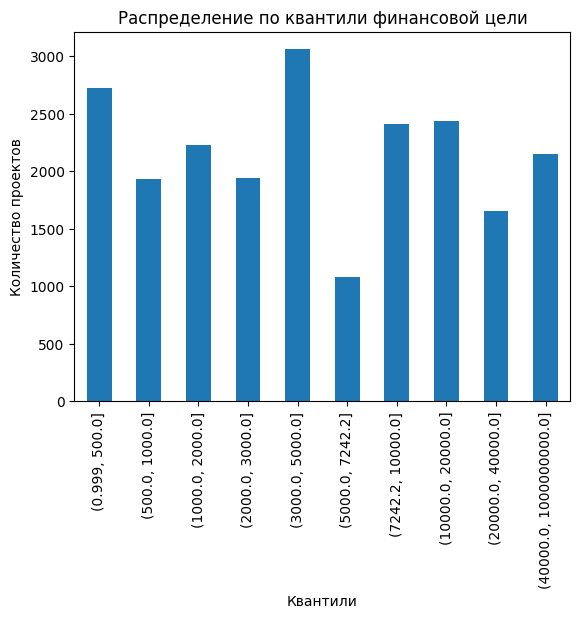

In [10]:
pd.qcut(kick_df['goal'], 10).value_counts().sort_index().plot(kind='bar')
plt.title('Распределение по квантили финансовой цели')
plt.xlabel('Квантили')
plt.ylabel('Количество проектов')

<Axes: title={'center': 'Распределенние по статусу'}, xlabel='state'>

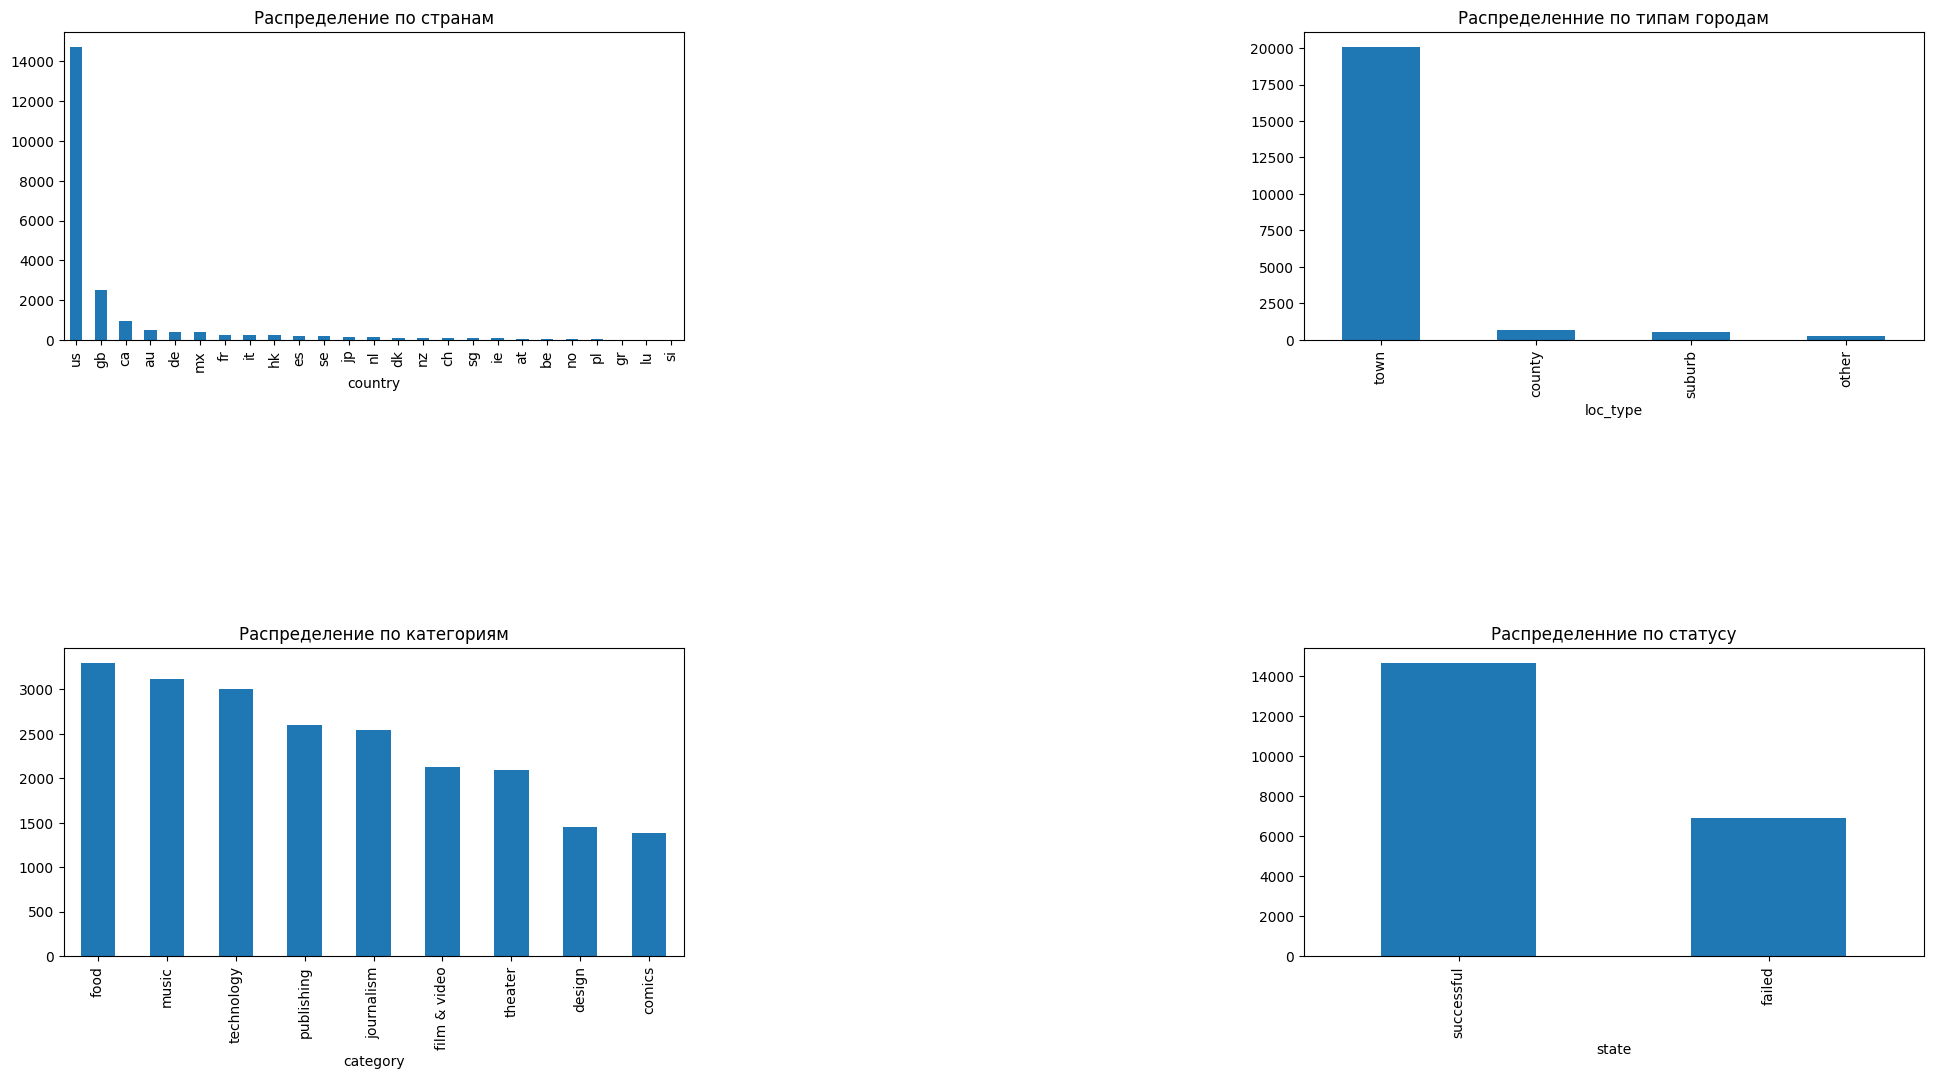

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))
fig.subplots_adjust(hspace=1, wspace =1)
                    
kick_df['country'].value_counts().plot(kind = 'bar',ax=axes[0,0], title = 'Распределение по странам')
kick_df['loc_type'].value_counts().plot(kind = 'bar',ax=axes[0,1], title = 'Распределенние по типам городам')
kick_df['category'].value_counts().plot(kind = 'bar',ax=axes[1,0], title = 'Распределение по категориям')
kick_df['state'].value_counts().plot(kind = 'bar',ax=axes[1,1], title = 'Распределенние по статусу')

<Figure size 1400x800 with 0 Axes>

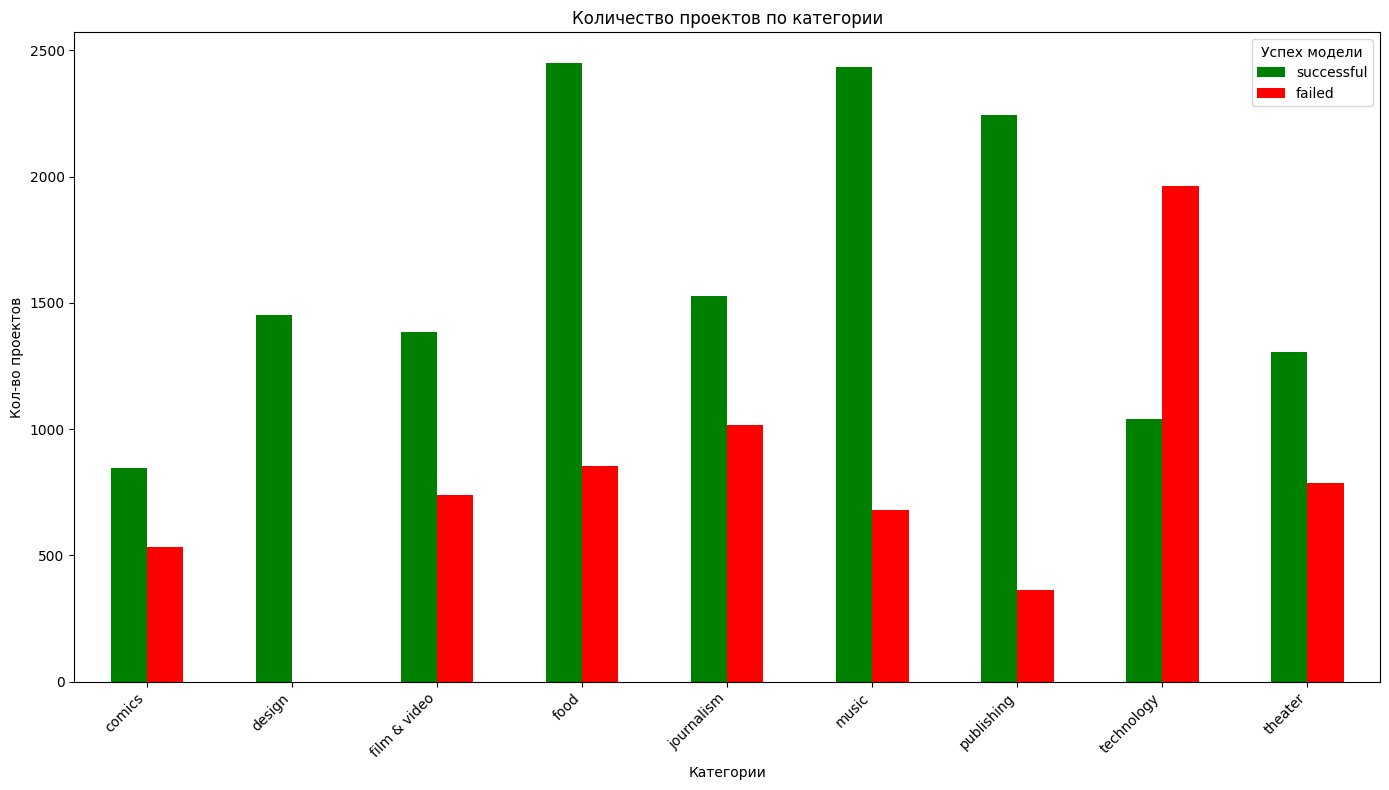

In [12]:
# Group the data by category and state, and count the occurrences
category_state_counts = kick_df.groupby(['category', 'state']).size().unstack(fill_value=0)

# Plot the counts for successful and failed projects by category
plt.figure(figsize=(14, 8))
category_state_counts[['successful', 'failed']].plot(kind='bar', stacked=False, figsize=(14, 8), color=['g', 'r'])

# Add labels and title
plt.title('Количество проектов по категории')
plt.xlabel('Категории')
plt.ylabel('Кол-во проектов')
plt.xticks(rotation=45, ha='right')
plt.legend(title="Успех модели", loc='upper right')

plt.tight_layout()
plt.show()

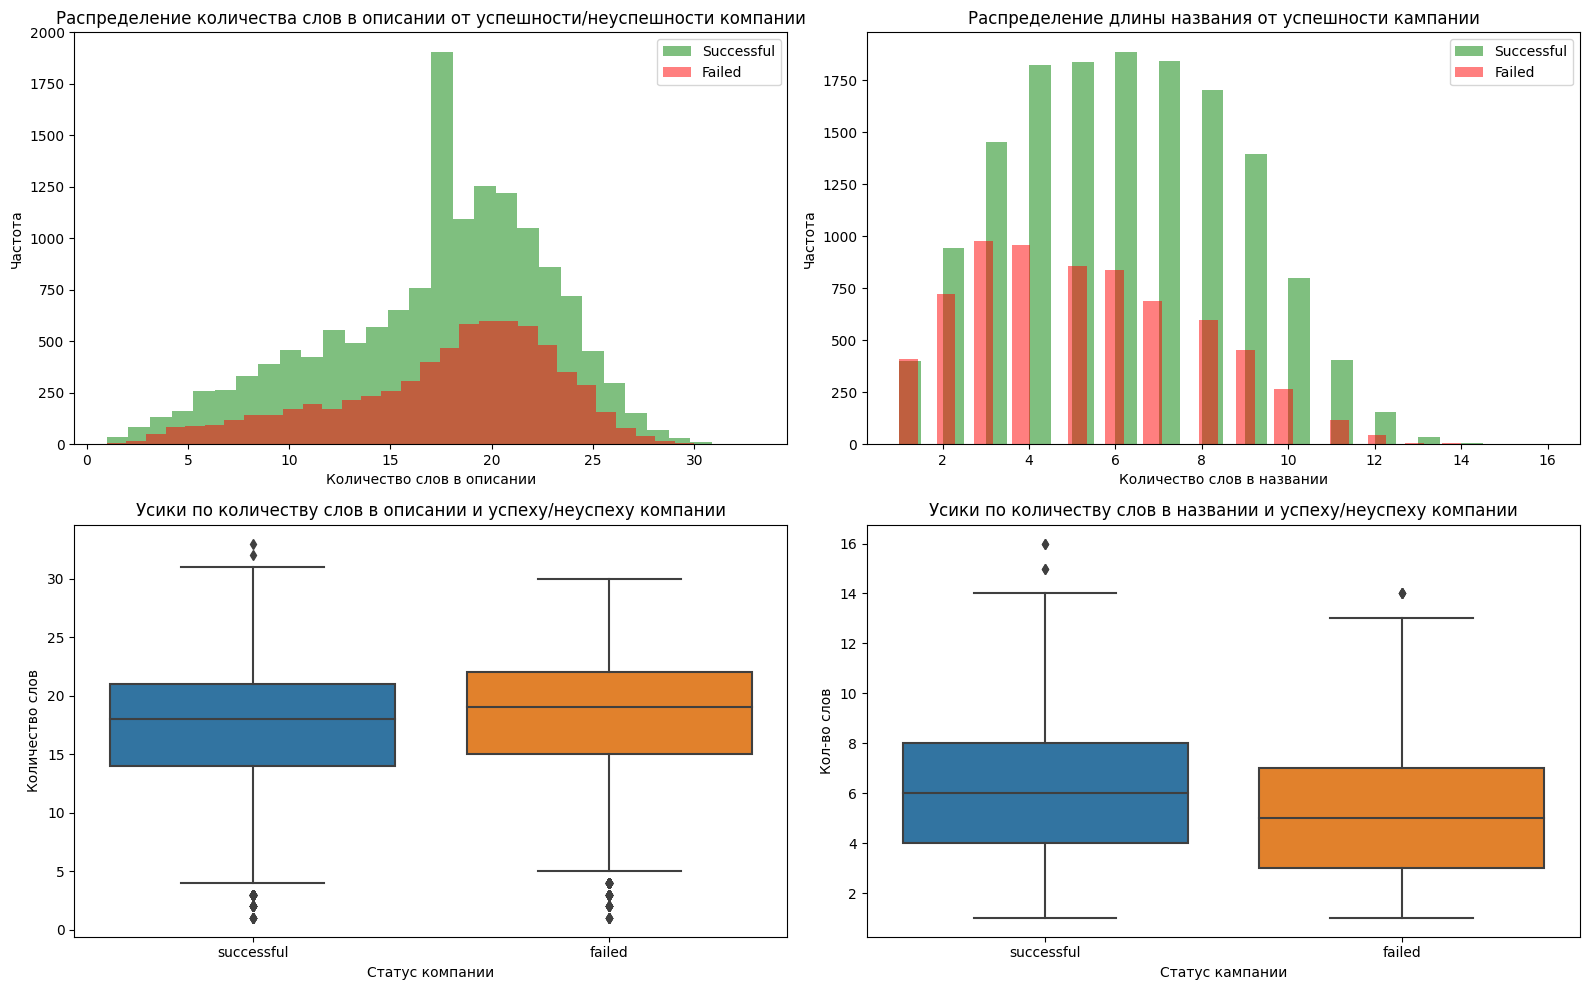

In [13]:
# Разделение данных на успешные и проваленные кампании
successful_campaigns = kick_df[kick_df['state'] == 'successful']
failed_campaigns = kick_df[kick_df['state'] == 'failed']


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

# Построение гистограмм
# plt.figure(figsize=(10, 6))


axes[0,0].hist(successful_campaigns['blurb_len'], bins=30, alpha=0.5, label='Successful', color='g')
axes[0,0].hist(failed_campaigns['blurb_len'], bins=30, alpha=0.5, label='Failed', color='r')

axes[0,0].set_title('Распределение количества слов в описании от успешности/неуспешности компании')
axes[0,0].set_xlabel('Количество слов в описании')
axes[0,0].set_ylabel('Частота')
axes[0,0].legend()


sns.boxplot(x='state', y='blurb_len', data=kick_df[kick_df['state'].isin(['successful', 'failed'])], ax=axes[1,0])
axes[1,0].set_title('Усики по количеству слов в описании и успеху/неуспеху компании')
axes[1,0].set_xlabel('Статус компании')
axes[1,0].set_ylabel('Количество слов')


axes[0,1].hist(successful_campaigns['name_len'], bins=30, alpha=0.5, label='Successful', color='g')
axes[0,1].hist(failed_campaigns['name_len'], bins=30, alpha=0.5, label='Failed', color='r')
axes[0,1].set_title('Распределение длины названия от успешности кампании')
axes[0,1].set_xlabel('Количество слов в названии')
axes[0,1].set_ylabel('Частота')
axes[0,1].legend()

# Boxplot для длины названия
sns.boxplot(x='state', y='name_len', data=kick_df[kick_df['state'].isin(['successful', 'failed'])], ax=axes[1,1])
axes[1,1].set_title('Усики по количеству слов в названии и успеху/неуспеху компании')
axes[1,1].set_xlabel('Статус кампании')
axes[1,1].set_ylabel('Кол-во слов')

# Показ графиков
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

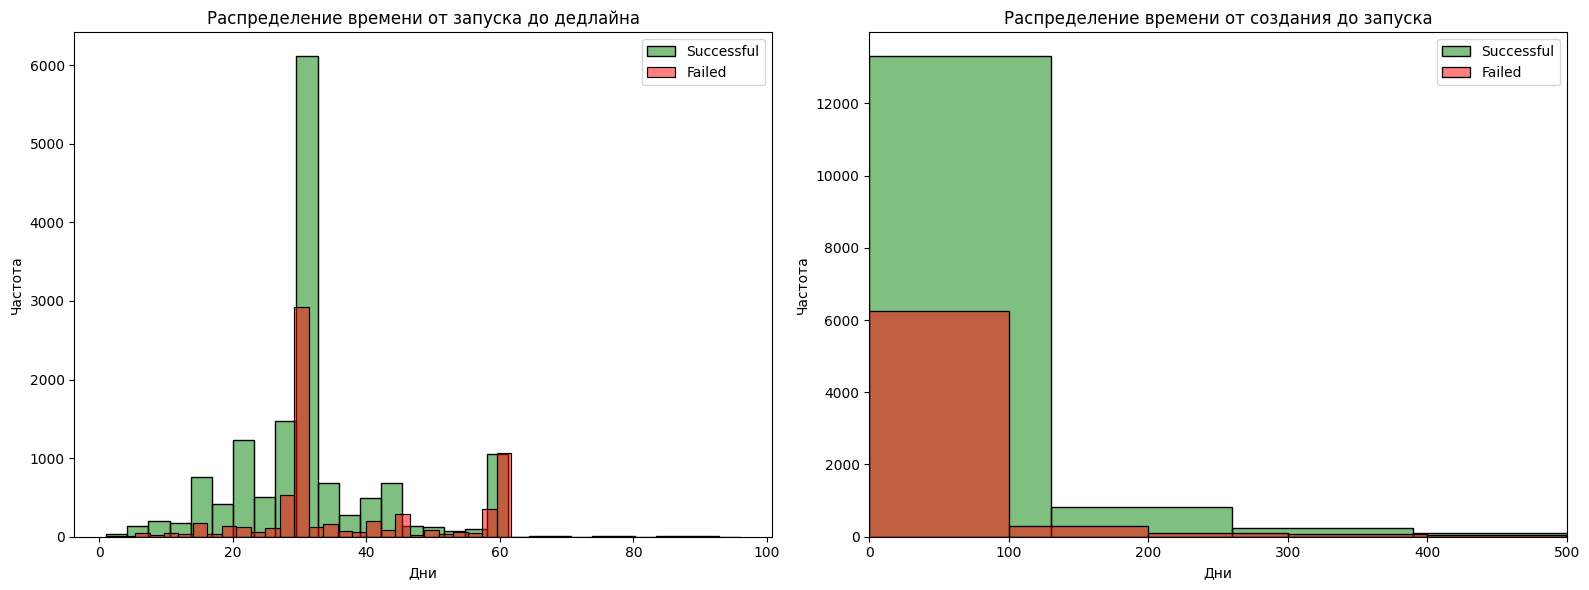

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# График 1: Time between launch and deadline
sns.histplot(successful_campaigns['launch_deadline'], bins=30, alpha=0.5, label='Successful', color='g', ax=axes[0])
sns.histplot(failed_campaigns['launch_deadline'], bins=30, alpha=0.5, label='Failed', color='r', ax=axes[0])
axes[0].set_title('Распределение времени от запуска до дедлайна')
axes[0].set_xlabel('Дни')
axes[0].set_ylabel('Частота')
axes[0].legend()

# График 2: Time between creation and launch
sns.histplot(successful_campaigns['create_launch'], bins=30, alpha=0.5, label='Successful', color='g', ax=axes[1])
sns.histplot(failed_campaigns['create_launch'], bins=30, alpha=0.5, label='Failed', color='r', ax=axes[1])
axes[1].set_title('Распределение времени от создания до запуска')
axes[1].set_xlabel('Дни')
axes[1].set_ylabel('Частота')
axes[1].set_xlim(0, 500) # Наблюдаются выбросы больше 500
axes[1].legend()

plt.tight_layout()
plt.show()

state         failed  successful  success_rate
category                                      
design             0        1453        100.00
publishing       361        2244         86.14
music            681        2436         78.15
food             853        2449         74.17
film & video     739        1385         65.21
theater          785        1307         62.48
comics           532         847         61.42
journalism      1018        1527         60.00
technology      1963        1040         34.63


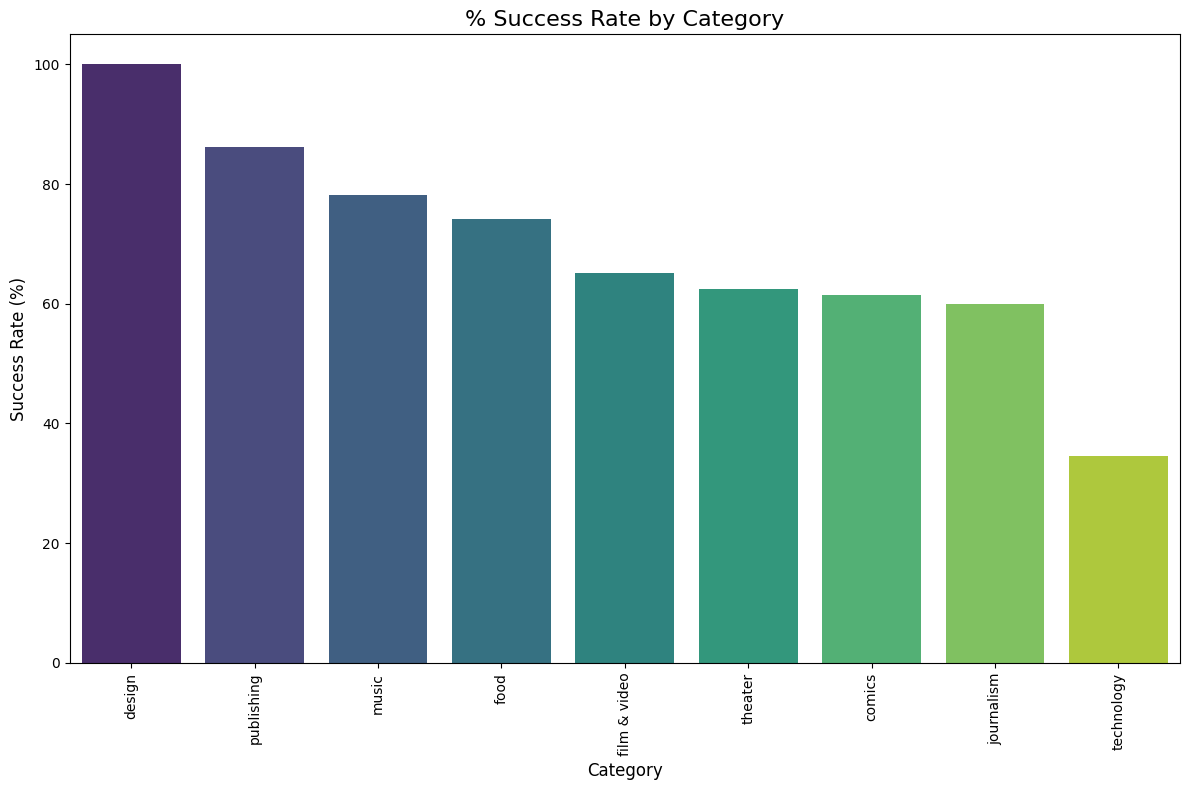

In [15]:
# Группируем по категориям
category_group = kick_df.groupby('category')['state'].value_counts().unstack(fill_value=0)

# Посчитаем процент успеха по категориям
category_group['success_rate'] = (category_group['successful'] / 
                                  (category_group['successful'] + category_group['failed'])) * 100

category_group_sorted = category_group.sort_values(by='success_rate', ascending=False)
print(category_group_sorted)
plt.figure(figsize=(12, 8))
sns.barplot(x=category_group_sorted.index, y=category_group_sorted['success_rate'], palette='viridis')
# Add titles and labels
plt.title('% Success Rate by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Success Rate (%)', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)
plt.tight_layout()

# Show plot
plt.show()

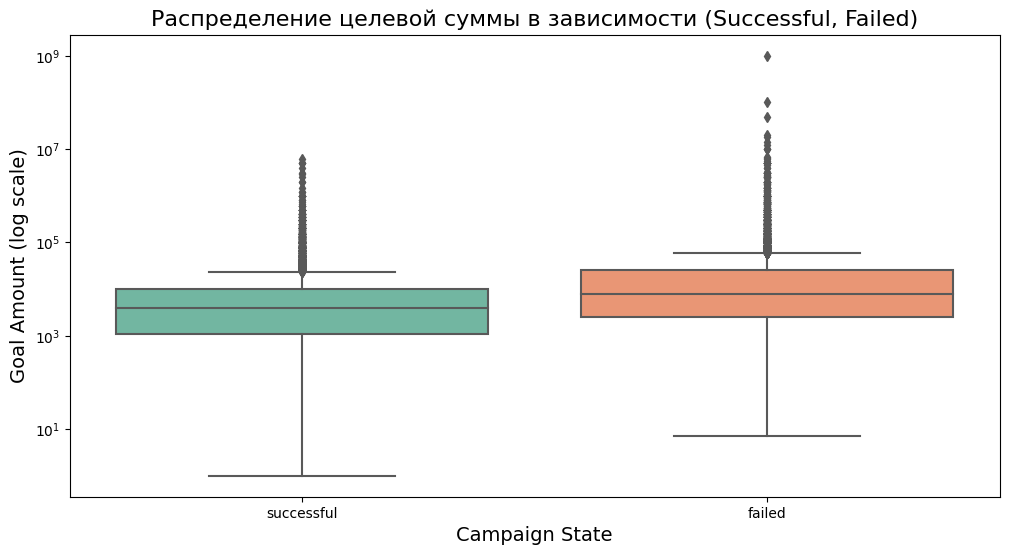

In [16]:
filtered_df = kick_df[kick_df['state'].isin(['successful', 'failed'])]
plt.figure(figsize=(12, 6))

sns.boxplot(x='state', y='goal', data=filtered_df, palette='Set2')

plt.title('Распределение целевой суммы в зависимости (Successful, Failed)', fontsize=16)
plt.xlabel('Campaign State', fontsize=14)
plt.ylabel('Goal Amount (log scale)', fontsize=14)

plt.yscale('log')

# Show the plot
plt.show()

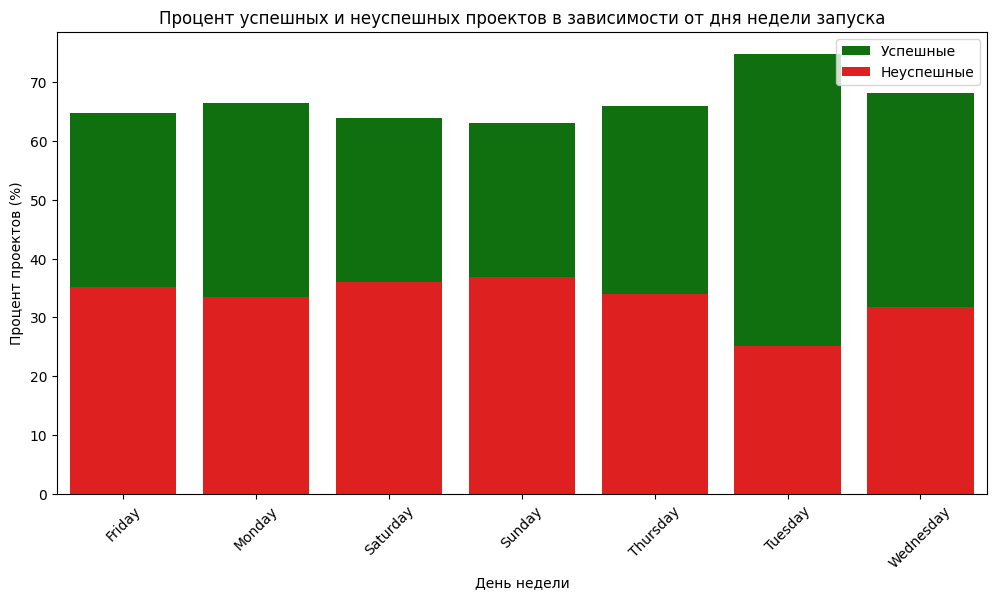

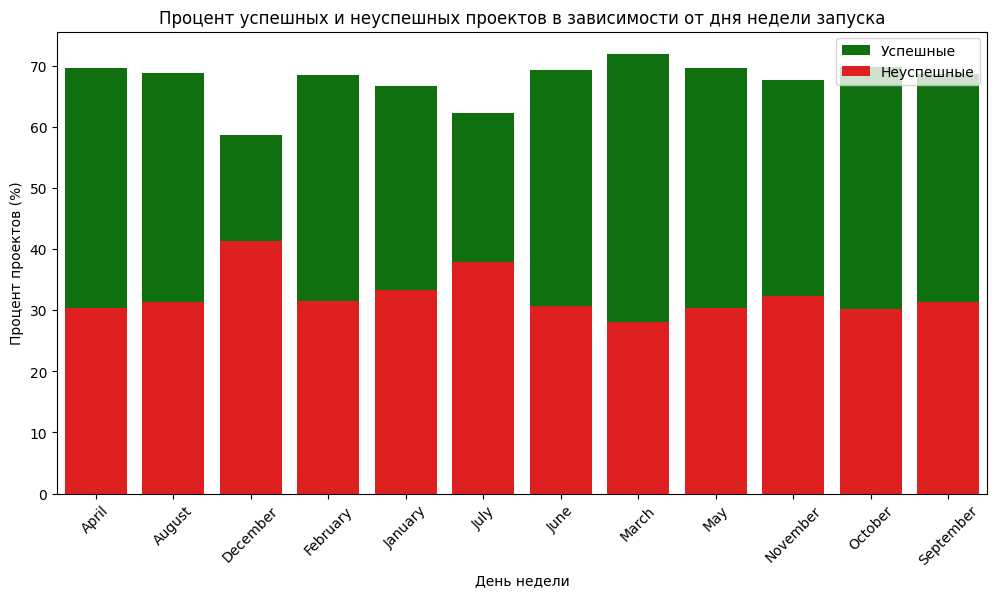

In [17]:
# Успешные проекты
success_weekday = kick_df.groupby('launch_weekday')['state_num'].mean() * 100

# Неуспешные проекты (дополнение до 100% от успешных)
failed_weekday = 100 - success_weekday

# Построение графика для успешных и неуспешных проектов
plt.figure(figsize=(12, 6))

# График для успешных проектов
sns.barplot(x=success_weekday.index, y=success_weekday.values, color='green', label='Успешные')

# График для неуспешных проектов
sns.barplot(x=failed_weekday.index, y=failed_weekday.values, color='red', label='Неуспешные')

plt.title('Процент успешных и неуспешных проектов в зависимости от дня недели запуска')
plt.ylabel('Процент проектов (%)')
plt.xlabel('День недели')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

success_month = kick_df.groupby('launch_month')['state_num'].mean() * 100

# Неуспешные проекты (дополнение до 100% от успешных)
failed_month = 100 - success_month

# Построение графика для успешных и неуспешных проектов
plt.figure(figsize=(12, 6))

# График для успешных проектов
sns.barplot(x=success_month.index, y=success_month.values, color='green', label='Успешные')

# График для неуспешных проектов
sns.barplot(x=failed_month.index, y=failed_month.values, color='red', label='Неуспешные')

plt.title('Процент успешных и неуспешных проектов в зависимости от дня недели запуска')
plt.ylabel('Процент проектов (%)')
plt.xlabel('День недели')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

/tmp/ipykernel_3632/2123536229.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_group = test_df.groupby(['goal_bucket', 'state']).size().unstack(fill_value=0)


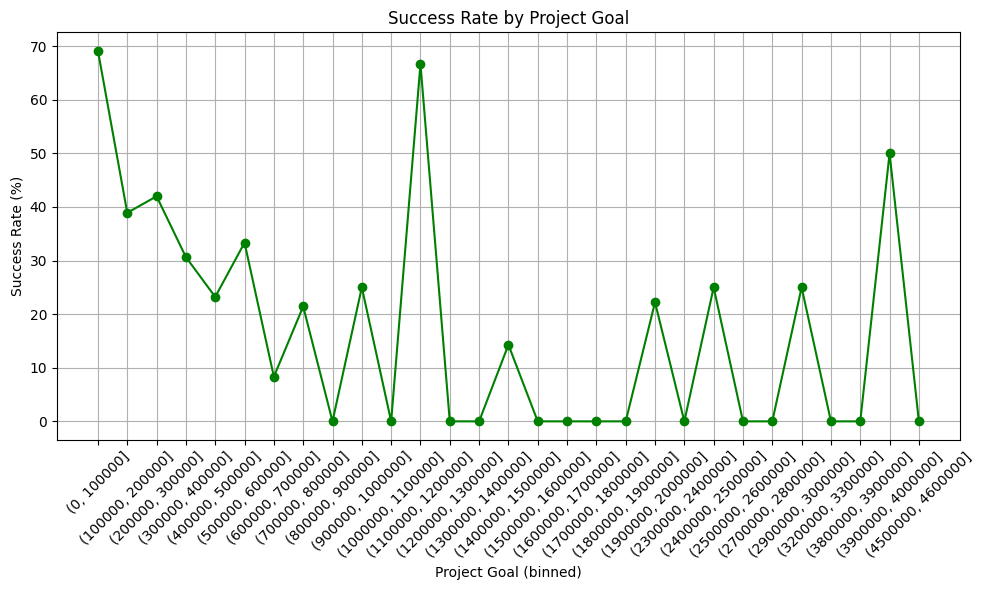

In [18]:
test_df = kick_df.copy()

# Определяем диапазоны для целей проектов (например, шаг в 5000)
bins = np.arange(0, 5000000, 100000)

# Создаем новый столбец с категориями по размеру цели
test_df['goal_bucket'] = pd.cut(test_df['goal'], bins=bins)

# Группируем по размеру цели и состоянию проекта
goal_group = test_df.groupby(['goal_bucket', 'state']).size().unstack(fill_value=0)

# Рассчитываем процент успешных проектов для каждого диапазона
goal_group['success_rate'] = (goal_group['successful'] / (goal_group['successful'] + goal_group['failed'])) * 100

# Удаляем значения с нулевым количеством проектов (можно убрать если нужно показать все диапазоны)
goal_group = goal_group[goal_group['successful'] + goal_group['failed'] > 0]

plt.figure(figsize=(10, 6))
plt.plot(goal_group.index.astype(str), goal_group['success_rate'], marker='o', linestyle='-', color='g', label='Success Rate')

# Добавляем заголовки и подписи
plt.title('Success Rate by Project Goal')
plt.xlabel('Project Goal (binned)')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend

plt.tight_layout()
plt.show()

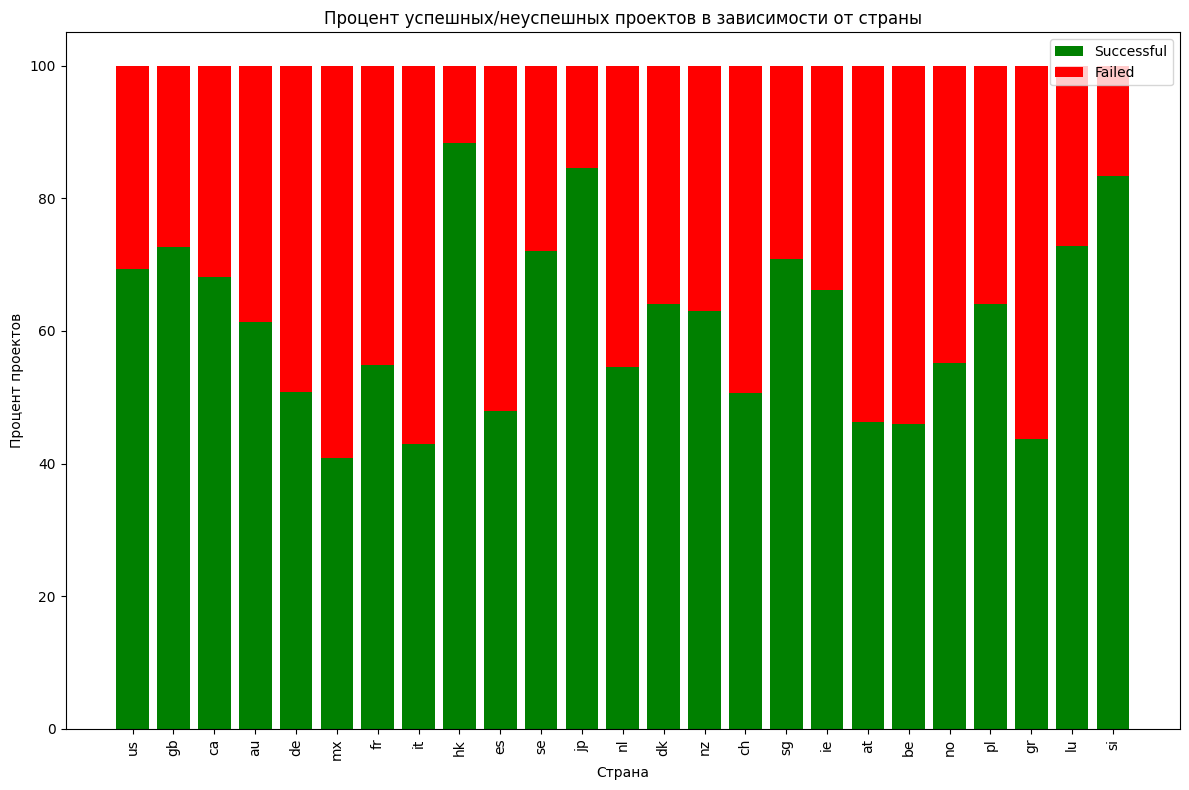

In [19]:
# Группировка данных по странам и состоянию проектов
grouped_country = kick_df.groupby(['country', 'state'])['state'].count().unstack(fill_value=0)

grouped_country['total'] = grouped_country['successful'] + grouped_country['failed']
grouped_country['success_perc'] = (grouped_country['successful'] / grouped_country['total']) * 100
grouped_country['failed_perc'] = (grouped_country['failed'] / grouped_country['total']) * 100

# Сортировка данных по общему количеству проектов
grouped_country = grouped_country.sort_values(by='total', ascending=False)

# Построение составного столбчатого графика
plt.figure(figsize=(12, 8))
plt.bar(grouped_country.index, grouped_country['success_perc'], label='Successful', color='g')
plt.bar(grouped_country.index, grouped_country['failed_perc'], bottom=grouped_country['success_perc'], label='Failed', color='r')

# Оформление графика
plt.xticks(rotation=90)
plt.title('Процент успешных/неуспешных проектов в зависимости от страны')
plt.xlabel('Страна')
plt.ylabel('Процент проектов')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

state     failed  successful  total  success_perc  failed_perc
loc_type                                                      
town        6433       13661  20094         67.99        32.01
county       180         537    717         74.90        25.10
suburb       235         335    570         58.77        41.23
other         84         155    239         64.85        35.15


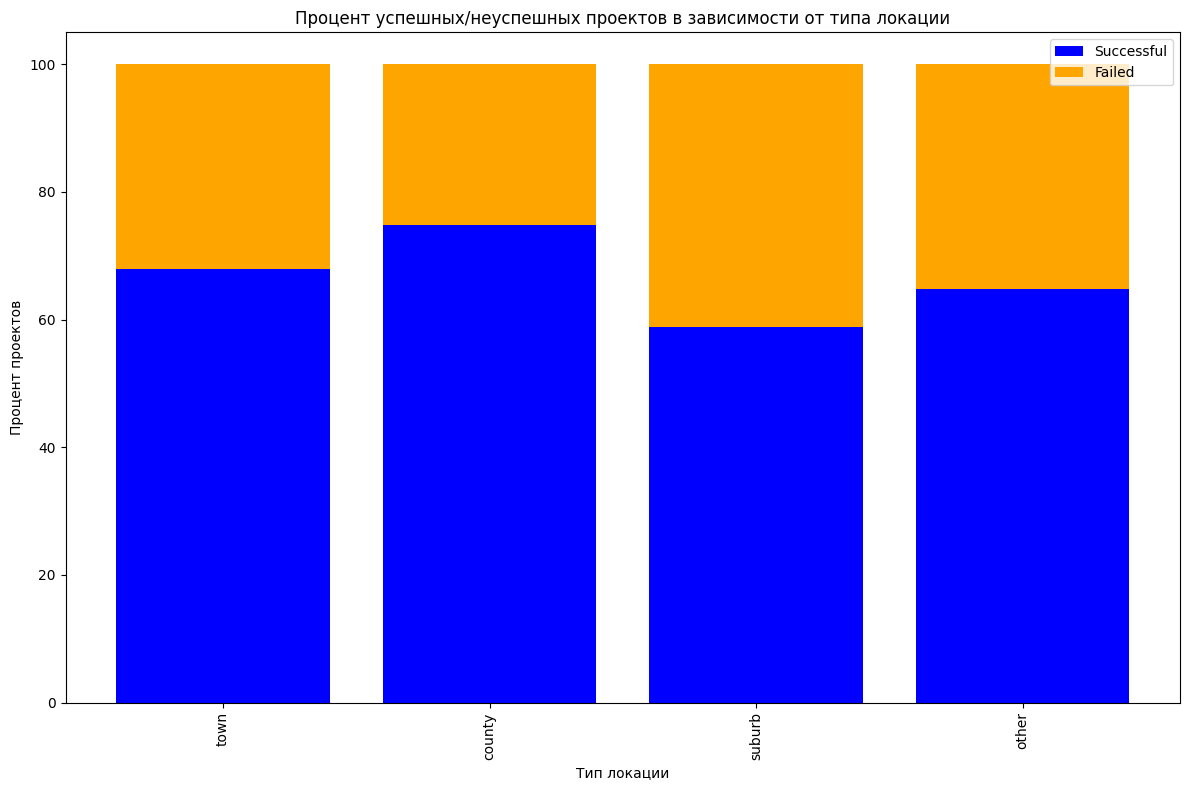

In [20]:
grouped_loc_type = kick_df.groupby(['loc_type', 'state'])['state'].count().unstack(fill_value=0)

# Вычисление общего количества проектов для каждого типа локации
grouped_loc_type['total'] = grouped_loc_type['successful'] + grouped_loc_type['failed']

# Вычисление процентов успешных и неуспешных проектов по типу локации
grouped_loc_type['success_perc'] = (grouped_loc_type['successful'] / grouped_loc_type['total']) * 100
grouped_loc_type['failed_perc'] = (grouped_loc_type['failed'] / grouped_loc_type['total']) * 100

# Сортировка данных по общему количеству проектов
grouped_loc_type = grouped_loc_type.sort_values(by='total', ascending=False)
print(grouped_loc_type)
# Построение составного столбчатого графика по типу локации
plt.figure(figsize=(12, 8))
plt.bar(grouped_loc_type.index, grouped_loc_type['success_perc'], label='Successful', color='b')
plt.bar(grouped_loc_type.index, grouped_loc_type['failed_perc'], bottom=grouped_loc_type['success_perc'], label='Failed', color='orange')

# Оформление графика
plt.xticks(rotation=90)
plt.title('Процент успешных/неуспешных проектов в зависимости от типа локации')
plt.xlabel('Тип локации')
plt.ylabel('Процент проектов')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [21]:
success_loc = kick_df.groupby('location')['state_num'].mean()

top_cities = success_loc.nlargest(2000)
top_cities

location
{"id":1062605,"name":"serangoon","slug":"serangoon-sg","short_name":"serangoon, singapore","displayable_name":"serangoon, singapore","localized_name":"serangoon","country":"sg","state":"north east","type":"town","is_root":false,"expanded_country":"singapore","urls":{"web":{"discover":"https://www.kickstarter.com/discover/places/serangoon-sg","location":"https://www.kickstarter.com/locations/serangoon-sg"},"api":{"nearby_projects":"https://api.kickstarter.com/v1/discover?signature=1702611009.ad4aae437c58255380f608c29616208736d97269&woe_id=1062605"}}}   1.00
{"id":10650,"name":"alloa","slug":"alloa-gb","short_name":"alloa, uk","displayable_name":"alloa, uk","localized_name":"alloa","country":"gb","state":"scotland","type":"town","is_root":false,"expanded_country":"united kingdom","urls":{"web":{"discover":"https://www.kickstarter.com/discover/places/alloa-gb","location":"https://www.kickstarter.com/locations/alloa-gb"},"api":{"nearby_projects":"https://api.kickstarter.com/v1/dis

In [22]:
grouped_country['success_failed_ratio'] = grouped_country['success_perc'] / grouped_country['failed_perc']

# Сортируем по этому отношению в порядке убывания
sorted_countries = grouped_country[grouped_country['success_failed_ratio'] > 2].sort_values(by='success_failed_ratio', ascending=False)
top_countries = sorted_countries.index.to_list()
# Получаем топ-10 стран с самым высоким отношением успешных к неуспешным
# top_10_successful_countries = sorted_countries.head(13)

# Выводим результат
print("Страны с соотношение успеха/неуспеха 1,5 (70/30)")
print(sorted_countries[['success_perc', 'failed_perc', 'success_failed_ratio']])
print(top_countries)

Страны с соотношение успеха/неуспеха 1,5 (70/30)
state    success_perc  failed_perc  success_failed_ratio
country                                                 
hk              88.26        11.74                  7.52
jp              84.62        15.38                  5.50
si              83.33        16.67                  5.00
lu              72.73        27.27                  2.67
gb              72.66        27.34                  2.66
se              72.02        27.98                  2.57
sg              70.89        29.11                  2.43
us              69.37        30.63                  2.26
ca              68.17        31.83                  2.14
['hk', 'jp', 'si', 'lu', 'gb', 'se', 'sg', 'us', 'ca']


In [23]:
kick_df['country'].isin(top_countries).value_counts()

country
True     18925
False     2695
Name: count, dtype: int64

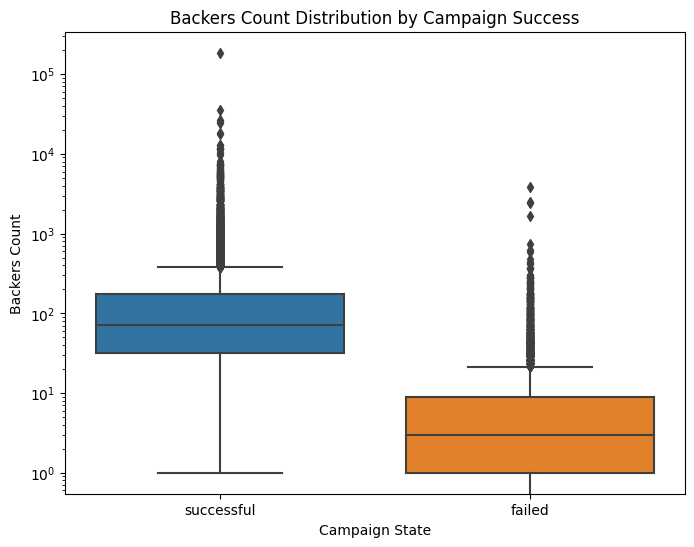

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='state', y='backers_count', data=kick_df[kick_df['state'].isin(['successful', 'failed'])])
plt.title('Backers Count Distribution by Campaign Success')
plt.xlabel('Campaign State')
plt.ylabel('Backers Count')
plt.yscale('log')  # Логарифмическая шкала для учета большого разброса
plt.show()

In [25]:
grouped = kick_df.groupby(['staff_pick', 'state'])[['state']].count().unstack(fill_value=0)
grouped.columns = grouped.columns.droplevel()

grouped['success_to_fail_ratio'] = (grouped['successful'] / (grouped['failed'] + grouped['successful'])) * 100
print(grouped)

state       failed  successful  success_to_fail_ratio
staff_pick                                           
false         6704       10696                  61.47
true           228        3992                  94.60


In [28]:
test_df = kick_df.copy()

# Features Transformation
bool_columns = ['staff_pick', 'in_top_countries']
# Создами фичу, где 1 - В top_countries, 0 - нет
test_df['in_top_countries'] = test_df['country'].isin(top_countries)

# Из true/false в 1/0
change_columns = ['staff_pick', 'in_top_countries']
test_df[change_columns] = test_df[change_columns].replace({'true': True, 'false': False, 'True': True, 'False': False})

# One-Hot encoding к типу локации
one_hot = pd.get_dummies(test_df['loc_type'], prefix='loc_type')
test_df = pd.concat([test_df, one_hot], axis=1)

bool_columns = test_df.select_dtypes(include=['bool']).columns
test_df[bool_columns] = test_df[bool_columns].astype(int)

# Вычисление среднего значения для каждого уникального значения category
print(test_df['category'])
category_mean = test_df.groupby('category')['state_num'].mean().reset_index()
category_mean.columns = ['category', 'category_target_encoding']
test_df = test_df.merge(category_mean, on='category', how='left')

# Посчитаем среднее по таргету у категорий
category_group = test_df.groupby('category')['state'].value_counts().unstack(fill_value=0)
category_group['cat_success_rate'] = (category_group['successful'] / 
                                  (category_group['successful'] + category_group['failed'])) * 100
category_group = category_group.reset_index()
test_df = test_df.merge(category_group[['category', 'cat_success_rate']], on='category', how='left')


categorical_columns = ['launch_month', 'launch_weekday']  # пример категориальных колонок
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    test_df[col + '_encoded'] = le.fit_transform(kick_df[col])
    label_encoders[col] = le 
    
# test_df.to_csv('version_first_preprocessed.csv', index=False)

12       journalism
13       journalism
15       journalism
17       journalism
18       journalism
            ...    
24907    technology
24908    technology
24909    technology
24910    technology
24911    technology
Name: category, Length: 21620, dtype: object


/tmp/ipykernel_3632/1311588324.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df[change_columns] = test_df[change_columns].replace({'true': True, 'false': False, 'True': True, 'False': False})


In [31]:
# Features Transformation
bool_columns = ['staff_pick', 'in_top_countries']
# Создами фичу, где 1 - В top_countries, 0 - нет
kick_df['in_top_countries'] = kick_df['country'].isin(top_countries)

# Из true/false в 1/0
change_columns = ['staff_pick', 'in_top_countries']
kick_df[change_columns] = kick_df[change_columns].replace({'true': True, 'false': False, 'True': True, 'False': False})

# One-Hot encoding к типу локации
one_hot = pd.get_dummies(kick_df['loc_type'], prefix='loc_type')
kick_df = pd.concat([kick_df, one_hot], axis=1)

bool_columns = kick_df.select_dtypes(include=['bool']).columns
kick_df[bool_columns] = kick_df[bool_columns].astype(int)

# Вычисление среднего значения для каждого уникального значения category
category_mean = kick_df.groupby('category')['state_num'].mean().reset_index()
category_mean.columns = ['category', 'category_target_encoding']
kick_df = kick_df.merge(category_mean, on='category', how='left')


categorical_columns = ['launch_month', 'launch_weekday']  # пример категориальных колонок
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    kick_df[col + '_encoded'] = le.fit_transform(kick_df[col])
    label_encoders[col] = le 
    
kick_df.to_csv('version_first_preprocessed.csv', index=False)

/tmp/ipykernel_3632/807328924.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  kick_df[change_columns] = kick_df[change_columns].replace({'true': True, 'false': False, 'True': True, 'False': False})


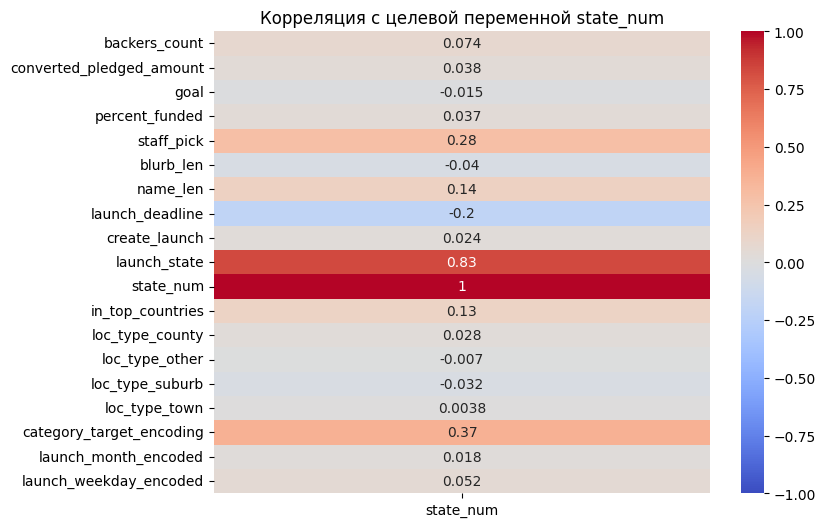

In [32]:
numeric_columns = kick_df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = kick_df.select_dtypes(exclude=['number']).columns.tolist()
# Корреляционный анализ

correlation_matrix = kick_df[numeric_columns].corr()

# Выбор корреляции с целевой переменной 'state_num'
correlation_with_target = correlation_matrix[['state_num']]

# Построение тепловой карты корреляции
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция с целевой переменной state_num')
plt.show()

In [45]:
# Выбираем следующие колонки на удаление
columns_to_drop = ['backers_count', 'converted_pledged_amount', 'percent_funded', 'launch_state']

df_tt = kick_df[numeric_columns].drop(columns=columns_to_drop)
df_tt.to_csv('first_test_train_data.csv', index=False)

# Разделяем данные на признаки (X) и целевую переменную (y)
X = df_tt.drop(columns=['state_num'])
y = df_tt['state_num']

# Разбиваем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Простые модели

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

In [46]:
param_grid = {
    'n_estimators': [150],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5,                
                           verbose=2)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая оценка ROC-AUC:", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   1.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   1.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   1.4s
[CV] END max_depth=5, min_samples_leaf

In [47]:
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

In [48]:
def evaluate_metrics(y_true, y_pred, model):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    print(f"{model}: Accuracy={accuracy:.3f}, F1-Score={f1:.3f}, ROC-AUC={roc_auc:.3f}")
    return accuracy, f1, roc_auc

def measure_inference_time(model, X, n_runs=100):
    total_time = 0
    for _ in range(n_runs):
        start_time = time.time()  # Запоминаем начальное время
        _ = model.predict(X)  # Выполняем предсказание
        total_time += (time.time() - start_time)  # Измеряем прошедшее время

    average_time = total_time / n_runs  # Среднее время вывода
    return average_time

Decision Tree: Accuracy=0.722, F1-Score=0.796, ROC-AUC=0.681
Logistic Regression: Accuracy=0.705, F1-Score=0.813, ROC-AUC=0.569
Random Forest+GS: Accuracy=0.797, F1-Score=0.859, ROC-AUC=0.735
                 Model  Accuracy  F1-Score  ROC-AUC
0        Decision Tree      0.72      0.80     0.68
1  Logistic Regression      0.70      0.81     0.57
2     Random Forest+GS      0.80      0.86     0.74


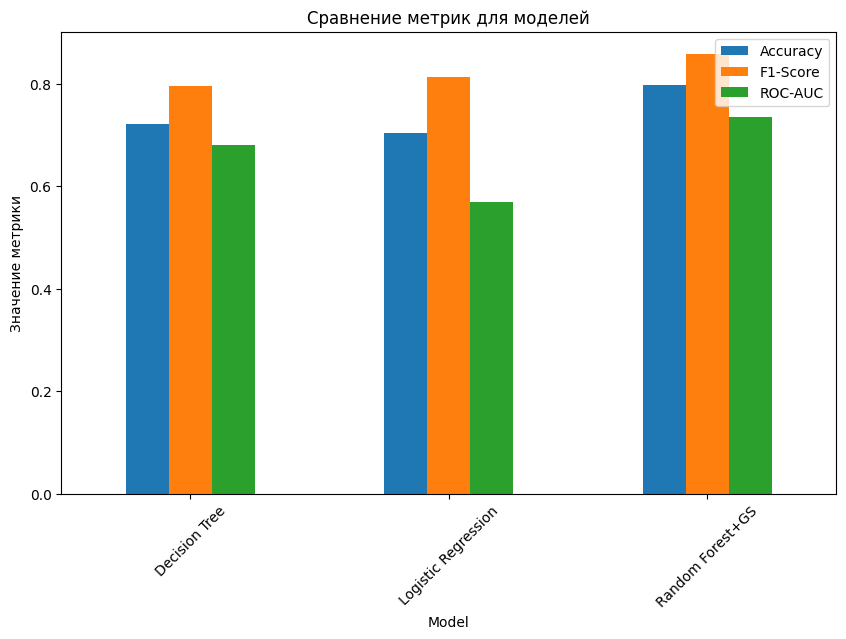

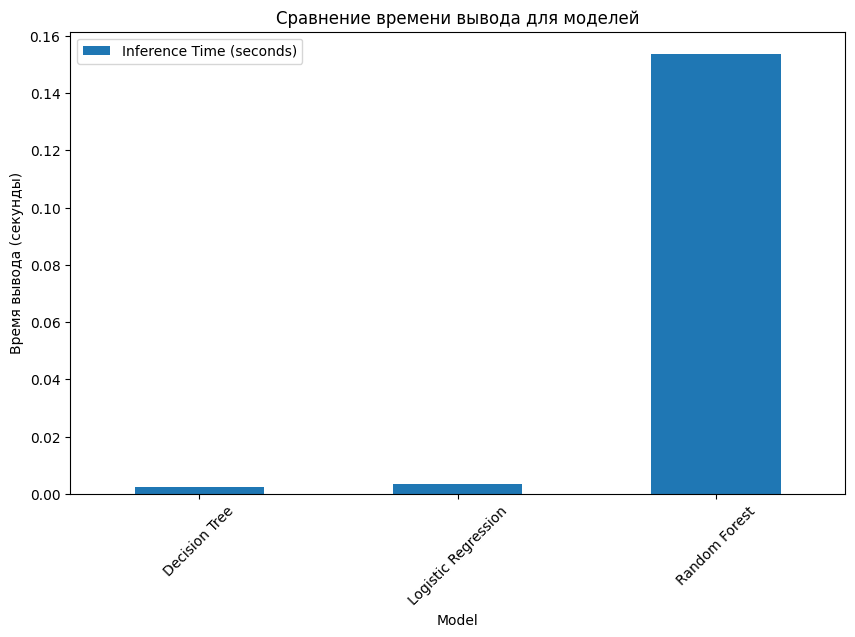

In [49]:
inference_dt = measure_inference_time(decision_tree, X_test)
inference_lr = measure_inference_time(log_reg, X_test)
inference_rf = measure_inference_time(best_rf, X_test)

metrics_dt = evaluate_metrics(y_test, y_pred_dt, "Decision Tree")
metrics_lr = evaluate_metrics(y_test, y_pred_lr, "Logistic Regression")
metrics_best_rf = evaluate_metrics(y_test, y_pred_best_rf, "Random Forest+GS")

# Сравнение метрик
metrics_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression', 'Random Forest+GS'],
    'Accuracy': [metrics_dt[0], metrics_lr[0], metrics_best_rf[0]],
    'F1-Score': [metrics_dt[1], metrics_lr[1], metrics_best_rf[1]],
    'ROC-AUC': [metrics_dt[2], metrics_lr[2], metrics_best_rf[2]]
})

print(metrics_df)

# Визуализация
metrics_df.set_index('Model', inplace=True)
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Сравнение метрик для моделей')
plt.ylabel('Значение метрики')
plt.xticks(rotation=45)
plt.show()

inference_metrics_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression', 'Random Forest'],
    'Inference Time (seconds)': [inference_dt, inference_lr, inference_rf]
})

inference_metrics_df.set_index('Model', inplace=True)
inference_metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Сравнение времени вывода для моделей')
plt.ylabel('Время вывода (секунды)')
plt.xticks(rotation=45)
plt.show()

In [55]:
class_report_rf = classification_report(y_test, y_pred_best_rf)
print('CLASS_REPORT_RF')
print(class_report_rf)

CLASS_REPORT_RF
              precision    recall  f1-score   support

           0       0.74      0.57      0.64      1375
           1       0.82      0.91      0.86      2949

    accuracy                           0.80      4324
   macro avg       0.78      0.74      0.75      4324
weighted avg       0.79      0.80      0.79      4324



In [56]:
class_report_dt = classification_report(y_test, y_pred_dt)
print('CLASS_REPORT_DT')
print(class_report_dt)

CLASS_REPORT_DT
              precision    recall  f1-score   support

           0       0.56      0.57      0.56      1375
           1       0.80      0.79      0.80      2949

    accuracy                           0.72      4324
   macro avg       0.68      0.68      0.68      4324
weighted avg       0.72      0.72      0.72      4324



In [59]:
class_report_lr = classification_report(y_test, y_pred_lr)
print('CLASS_REPORT_LR')
print(class_report_lr)

CLASS_REPORT_LR
              precision    recall  f1-score   support

           0       0.61      0.20      0.30      1375
           1       0.72      0.94      0.81      2949

    accuracy                           0.70      4324
   macro avg       0.66      0.57      0.55      4324
weighted avg       0.68      0.70      0.65      4324

